In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt
import pyomo.environ as pe

from scipy.stats import rv_histogram

import nice
from nice.reload import deep_reload

In [179]:
nice.queue.probability_available(1 / 1800, 1 / 1800, 2)

array([0.33333333])

In [184]:
queue.available(.75, 3)

array([[0.07476636]])

In [192]:
x = np.linspace(0, 1 / 1800 * 5, 10)
c = np.arange(1, 5, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')

# xg * m * cg

xg / m / cg

array([[0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ],
       [0.        , 0.27777778, 0.55555556, 0.83333333, 1.11111111,
        1.38888889, 1.66666667, 1.94444444, 2.22222222, 2.5       ],
       [0.        , 0.18518519, 0.37037037, 0.55555556, 0.74074074,
        0.92592593, 1.11111111, 1.2962963 , 1.48148148, 1.66666667],
       [0.        , 0.13888889, 0.27777778, 0.41666667, 0.55555556,
        0.69444444, 0.83333333, 0.97222222, 1.11111111, 1.25      ]])

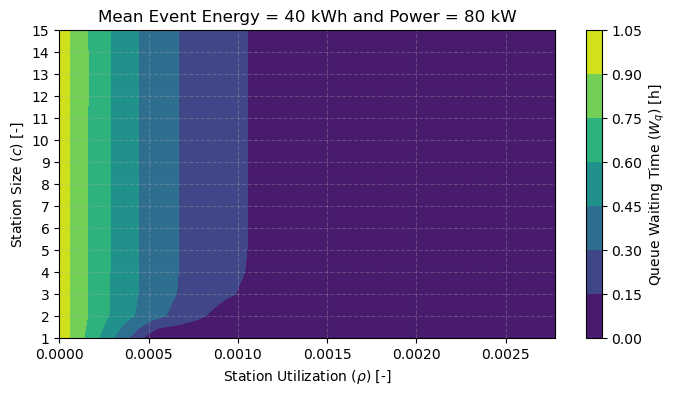

In [197]:
deep_reload(nice)

m = 1 / 1800
queue = nice.queue.Queue(m = m)

x = np.linspace(0, 1 / 1800 * 5, 100)
c = np.arange(1, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')

xg = xg / cg / m
z = queue.available(xg, cg)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))
levels = np.linspace(0, 1, 21)

kw = {
    'cmap': cmap.cmap,
    # 'levels': levels,
}
    
cb = ax.contourf(x, c, z, **kw)
ax.set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    # 'ticks': levels,
}

plt.colorbar(cb, ax = ax, **kw)


kw = {
    'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    # 'xticks': np.linspace(0, 1, 11),
    'yticks': c,
}

ax.set(**kw)

kw = {
    'ls': '--',
    'alpha': .3,
}

ax.grid(**kw)

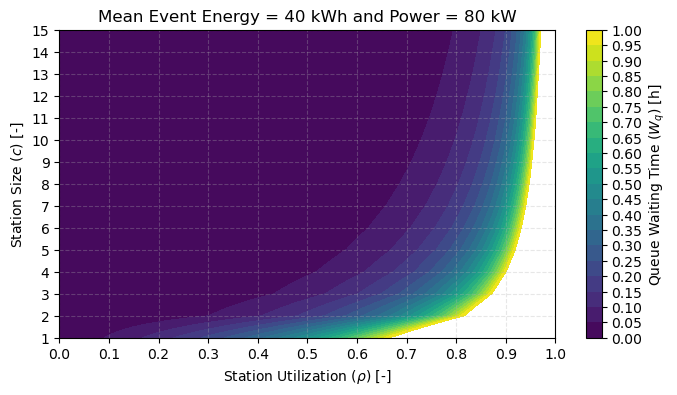

In [144]:
deep_reload(nice)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

cmap = nice.plot.Colormap('viridis')

m = 1 / (40 * 3.6e6 / 80e3)
queue = nice.queue.Queue(m = m, bounds = (0, 10 * 3600))
levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(1, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax.contourf(x, c, z, **kw)
ax.set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax, **kw)


kw = {
    'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c,
}

ax.set(**kw)

kw = {
    'ls': '--',
    'alpha': .3,
}

ax.grid(**kw)

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

In [60]:
'''
Stations
'''
from scipy.stats import binom
deep_reload(nice)

energy = 35 * 3.6e6
power = 80e3
m = 1 / (energy / power)

queue = nice.queue.Queue(m = m)

x = np.linspace(0, .99, 100)
c = np.arange(1, 60, 1)
p = binom(6, .75).pmf(c)

cg, xg = np.meshgrid(c, x, indexing = 'ij')

z = queue.interpolate(xg, cg) / 3600

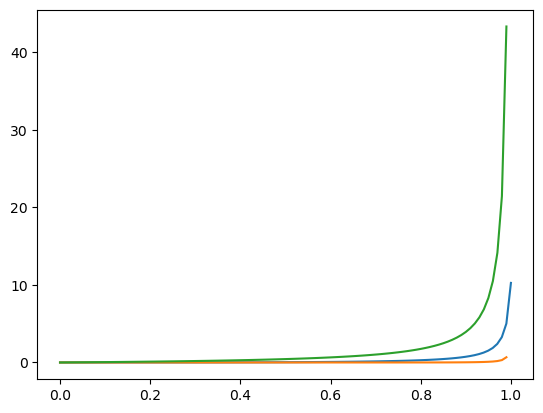

In [61]:
p = np.atleast_2d(binom(6, .75).pmf(c))
# pz = (p * z).sum(axis = 0)
pz = p @ z

plt.plot(rho, pz[0])

plt.plot(x, z[-1])
plt.plot(x, z[0])

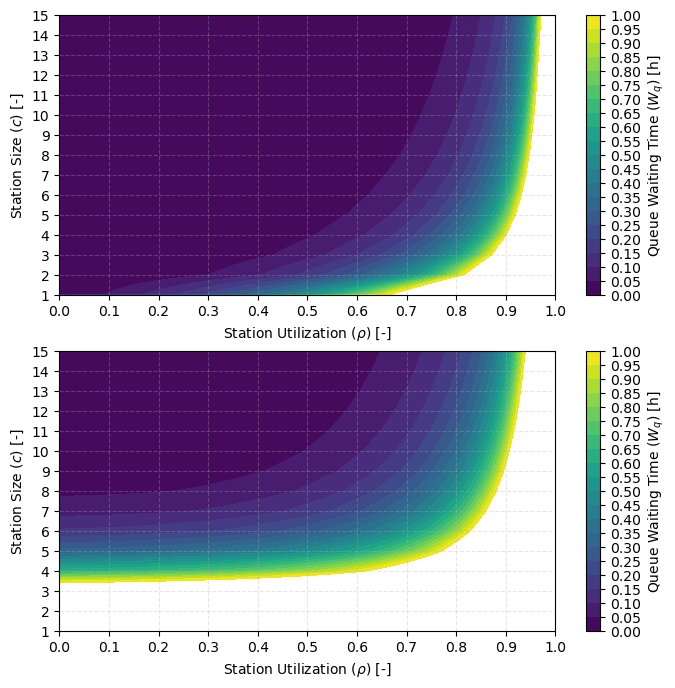

In [225]:
deep_reload(nice)

fig, ax = plt.subplots(2, 1, figsize = (8, 8))

cmap = nice.plot.Colormap('viridis')

m = 1 / (40 * 3.6e6 / 80e3)
m = 1 / 1800
queue = nice.queue.Queue(m = m, bounds = (0, 10 * 3600))
levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(0, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')
z = queue.interpolate(xg, cg) / 3600

zz = np.zeros_like(z)

for idx, ci in enumerate(c):

    p = np.atleast_2d(binom(ci, .5).pmf(c))

    zz[idx] = p @ z

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[0].contourf(x, c, z, **kw)
# ax[0].set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[0], **kw)


kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[1].contourf(x, c, zz, **kw)
# ax[1].set_title(r'Mean Event Energy = 40 kWh and Power = 80 kW')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[1], **kw)

kw = {
    'xlabel': r'Station Utilization ($\rho$) [-]',
    'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c[1:],
    'ylim': (c[1], c[-1]),
}

_ = [ax.set(**kw) for ax in ax]

kw = {
    'ls': '--',
    'alpha': .3,
}

_ = [ax.grid(**kw) for ax in ax]

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

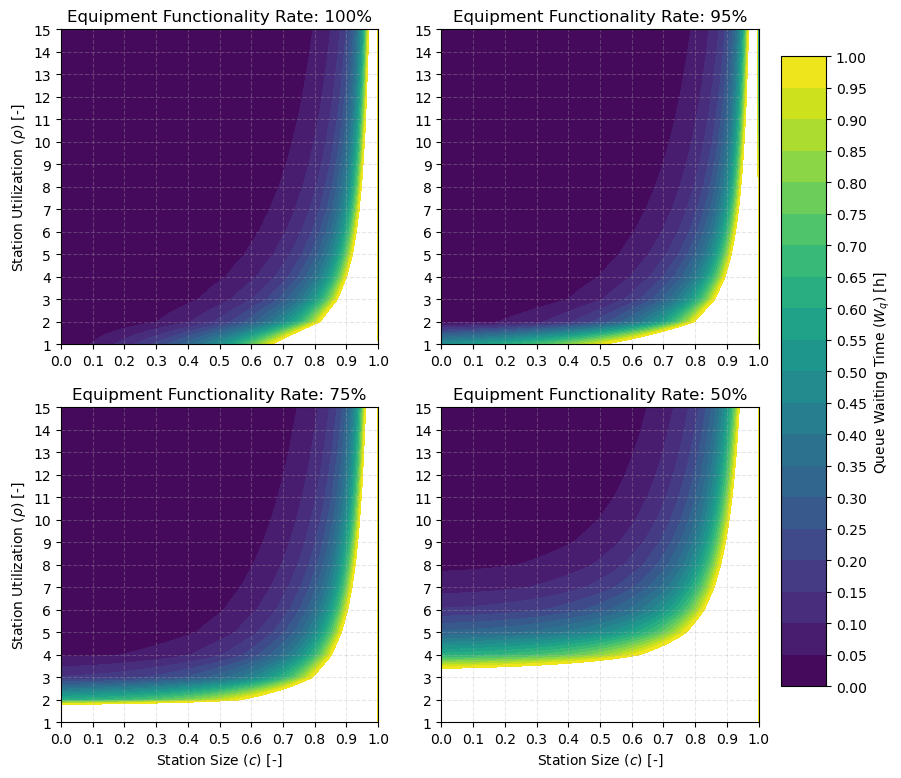

In [262]:
deep_reload(nice)

m = 1 / (40 * 3.6e6 / 80e3)
m = 1 / 1800

levels = np.linspace(0, 1, 21)
x = np.linspace(0, 1, 100)
c = np.arange(0, 16, 1)
cg, xg = np.meshgrid(c, x, indexing = 'ij')

fig, ax = plt.subplots(2, 2, figsize = (9, 9))
cmap = nice.plot.Colormap('viridis')

'' ''
queue = nice.queue.Queue(m = m, p = 1, cutoff = 10 * 3600)
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[0, 0].contourf(x, c, z, **kw)
ax[0, 0].set_title(r'Equipment Functionality Rate: 100%')
# ax[0, 0].set_xlabel(r'Station Size ($c$) [-]')
ax[0, 0].set_ylabel(r'Station Utilization ($\rho$) [-]')

'' ''
queue = nice.queue.Queue(m = m, p = .95, cutoff = 10 * 3600)
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[0, 1].contourf(x, c, z, **kw)
ax[0, 1].set_title(r'Equipment Functionality Rate: 95%')
# ax[0, 1].set_xlabel(r'Station Size ($c$) [-]')
# ax[0, 1].set_ylabel(r'Station Utilization ($\rho$) [-]')

'' ''
queue = nice.queue.Queue(m = m, p = .75, cutoff = 10 * 3600)
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[1, 0].contourf(x, c, z, **kw)
ax[1, 0].set_title(r'Equipment Functionality Rate: 75%')
ax[1, 0].set_xlabel(r'Station Size ($c$) [-]')
ax[1, 0].set_ylabel(r'Station Utilization ($\rho$) [-]')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

# plt.colorbar(cb, ax = ax[1, 0], **kw)

'' ''
queue = nice.queue.Queue(m = m, p = .5, cutoff = 10 * 3600)
z = queue.interpolate(xg, cg) / 3600

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[1, 1].contourf(x, c, z, **kw)
ax[1, 1].set_title(r'Equipment Functionality Rate: 50%')
ax[1, 1].set_xlabel(r'Station Size ($c$) [-]')
# ax[1, 1].set_ylabel(r'Station Utilization ($\rho$) [-]')

kw = {
    'label': r'Queue Waiting Time ($W_q$) [h]',
    'ticks': levels,
}

cbar_ax = fig.add_axes([0.925, 0.15, 0.05, 0.7])

plt.colorbar(cb, cax = cbar_ax, **kw)

kw = {
    # 'xlabel': r'Station Utilization ($\rho$) [-]',
    # 'ylabel': r'Station Size ($c$) [-]',
    'xticks': np.linspace(0, 1, 11),
    'yticks': c[1:],
    'ylim': (c[1], c[-1]),
}

_ = [ax.set(**kw) for ax in ax for ax in ax]

kw = {
    'ls': '--',
    'alpha': .3,
}

_ = [ax.grid(**kw) for ax in ax for ax in ax]

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

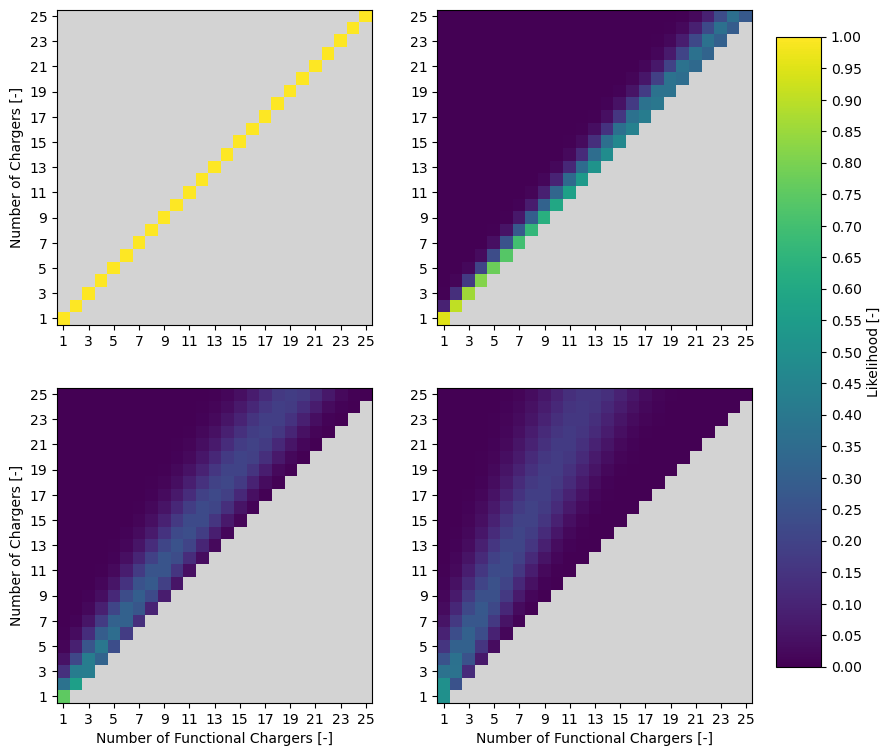

In [293]:
deep_reload(nice)

levels = np.linspace(0, 1, 21)

c = np.arange(1, 26, 1)

cr, cc = np.meshgrid(c, c, indexing = 'ij')

functional = {'100': [], '95': [], '75': [], '50': []}

for idx, ci in enumerate(c):

    functional['100'].append(binom(ci, 1).pmf(c))
    functional['95'].append(binom(ci, .95).pmf(c))
    functional['75'].append(binom(ci, .75).pmf(c))
    functional['50'].append(binom(ci, .5).pmf(c))

functional = {k: np.array(v).T for k, v in functional.items()}

for k, v in functional.items():

    v[v == 0] = np.nan

fig, ax = plt.subplots(2, 2, figsize = (9, 9))
# ax = [ax]

cmap = nice.plot.Colormap('viridis')

kw = {
    'cmap': cmap.cmap,
    'vmin': 0,
    'vmax': 1,
}
    
cb = ax[0, 0].imshow(np.rot90(functional['100']), **kw)
cb = ax[0, 1].imshow(np.rot90(functional['95']), **kw)
cb = ax[1, 0].imshow(np.rot90(functional['75']), **kw)
cb = ax[1, 1].imshow(np.rot90(functional['50']), **kw)

# ax[0, 0].grid(which = 'minor')

ax[0, 0].set_ylabel(r'Number of Chargers [-]')
ax[1, 0].set_xlabel(r'Number of Functional Chargers [-]')
ax[1, 0].set_ylabel(r'Number of Chargers [-]')
ax[1, 1].set_xlabel(r'Number of Functional Chargers [-]')

kw = {
    'label': 'Likelihood [-]',
    'ticks': levels,
}

cbar_ax = fig.add_axes([0.925, 0.15, 0.05, 0.7])

plt.colorbar(cb, cax = cbar_ax, **kw)
kw = {
    # 'xlabel': r'Number of Functional Chargers [-]',
    # 'ylabel': r'Number of Chargers [-]',
    'xticks': list(range(0, c[-1], 2)),
    'xticklabels': list(range(1, c[-1] + 1, 2)),
    'yticks': list(range(0, c[-1], 2)),
    'yticklabels': np.flip(list(range(1, c[-1] + 1, 2))),
    # 'yticks': c - 1,
    # 'yticklabels': np.flip(c),
    'fc': 'lightgray',
}

_ = [ax.set(**kw) for ax in ax for ax in ax]

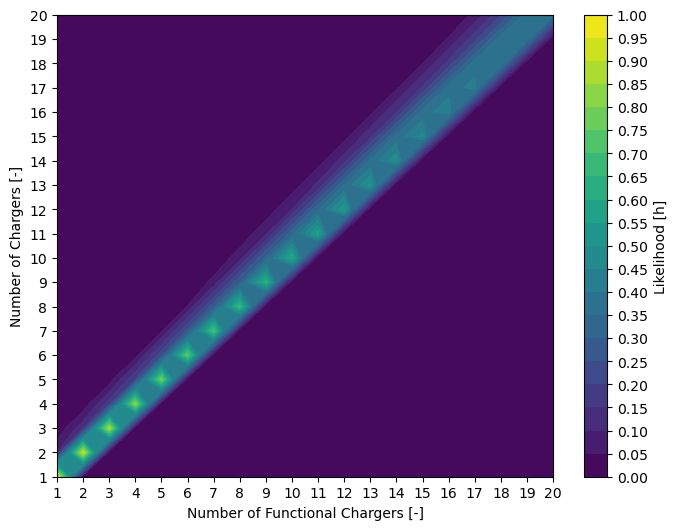

In [114]:
deep_reload(nice)

levels = np.linspace(0, 1, 21)

c = np.arange(1, 21, 1)

cr, cc = np.meshgrid(c, c, indexing = 'ij')

n = []

for idx, ci in enumerate(c):

    n.append(binom(ci, .95).pmf(c))

n = np.array(n).T


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = [ax]

cmap = nice.plot.Colormap('viridis')

kw = {
    'cmap': cmap.cmap,
    'levels': levels,
}
    
cb = ax[0].contourf(cr, cc, n, **kw)

kw = {
    'label': r'Likelihood [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[0], **kw)

kw = {
    'xlabel': r'Number of Functional Chargers [-]',
    'ylabel': r'Number of Chargers [-]',
    'xticks': np.linspace(0, 1, 11),
    'xticks': c,
    'yticks': c,
    # 'ylim': (c[1], c[-1]),
}

_ = [ax.set(**kw) for ax in ax]

# kw = {
#     'ls': '--',
#     'alpha': .3,
# }

# _ = [ax.grid(**kw) for ax in ax]

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

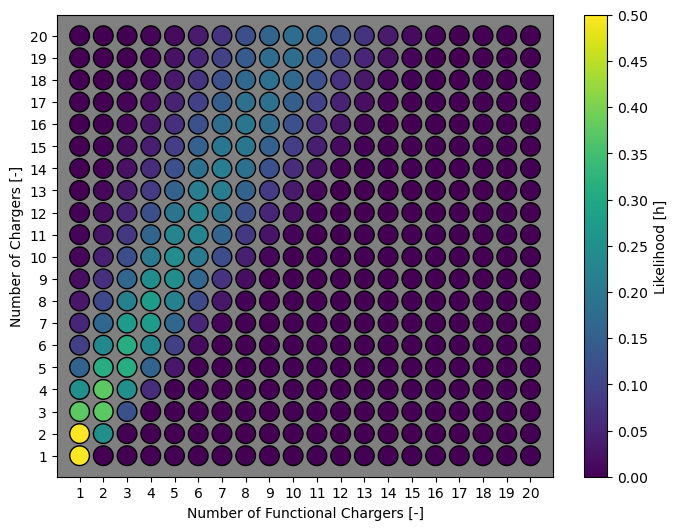

In [121]:
deep_reload(nice)

levels = np.linspace(0, 1, 21)

c = np.arange(1, 21, 1)

cr, cc = np.meshgrid(c, c, indexing = 'ij')

n = []

for idx, ci in enumerate(c):

    n.append(binom(ci, .5).pmf(c))

n = np.array(n).T


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = [ax]

cmap = nice.plot.Colormap('viridis')

kw = {
    'cmap': cmap.cmap,
    's': 200,
    'ec': 'k',
    # 'levels': levels,
}
    
cb = ax[0].scatter(cr.flatten(), cc.flatten(), c = n.flatten(), **kw)

kw = {
    'label': r'Likelihood [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[0], **kw)

kw = {
    'xlabel': r'Number of Functional Chargers [-]',
    'ylabel': r'Number of Chargers [-]',
    'xticks': np.linspace(0, 1, 11),
    'xticks': c,
    'yticks': c,
    'fc': 'gray',
    # 'ylim': (c[1], c[-1]),
}

_ = [ax.set(**kw) for ax in ax]

# kw = {
#     'ls': '--',
#     'alpha': .3,
# }

# _ = [ax.grid(**kw) for ax in ax]

# fig.savefig('Formulation/figs/queue.png', bbox_inches = 'tight', dpi = 300)

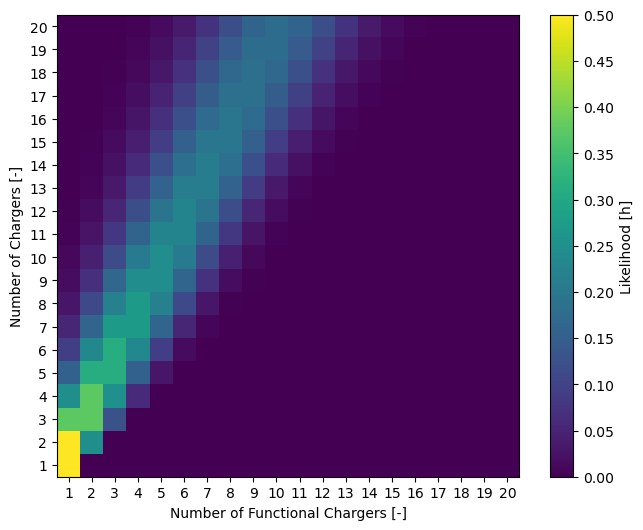

In [142]:
deep_reload(nice)

levels = np.linspace(0, 1, 21)

c = np.arange(1, 21, 1)

cr, cc = np.meshgrid(c, c, indexing = 'ij')

n = []

for idx, ci in enumerate(c):

    n.append(binom(ci, .5).pmf(c))

n = np.array(n).T


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = [ax]

cmap = nice.plot.Colormap('viridis')

kw = {
    'cmap': cmap.cmap,
}
    
cb = ax[0].imshow(np.rot90(n), **kw)

kw = {
    'label': r'Likelihood [h]',
    'ticks': levels,
}

plt.colorbar(cb, ax = ax[0], **kw)

kw = {
    'xlabel': r'Number of Functional Chargers [-]',
    'ylabel': r'Number of Chargers [-]',
    'xticks': c - 1,
    'xticklabels': c,
    'yticks': c - 1,
    'yticklabels': np.flip(c),
    'fc': 'gray',
}

_ = [ax.set(**kw) for ax in ax]

In [140]:
7 /8

0.875